<a href="https://colab.research.google.com/github/Ricardo0621/music-genre-and-emotion-classification/blob/master/NMA2021_TheTrogonQuartet_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NMA 2021: The Trogon Quartet**


In [ ]:
import os
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

#import from local system
from google.colab import files, drive
drive.mount('/content/drive')
#uploaded = files.upload()
audio_fpath = '/content/drive/My Drive/gtzan_sample'
# for i in range(11, 100):
#   urllib.request.urlretrieve('http://www.marsyas.info/sound/genres/classical/classical.000'+str(i)+'.wav', os.path.join(audio_fpath, 'classical.000'+str(i)+'.wav'))

  #!wget 'http://www.marsyas.info/sound/genres/classical/classical.0000'+str(i)+'.wav' -P os.path.join(audio_fpath, 'classical.0000'+str(i)+'.wav') 
# project_folder_name = 'gtzan_sample'
# audio_fpath = os.path.join(audio_fpath, 'classical.0000'+ str(i)'.wav') 
#audio_fpath = "../Desktop/Data/genres_original/"
#audio_clips = os.listdir(audio_fpath)
#print("No. of .wav files in audio folder = ",len(audio_clips))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<class 'numpy.ndarray'> <class 'int'>
(1323588,) 44100


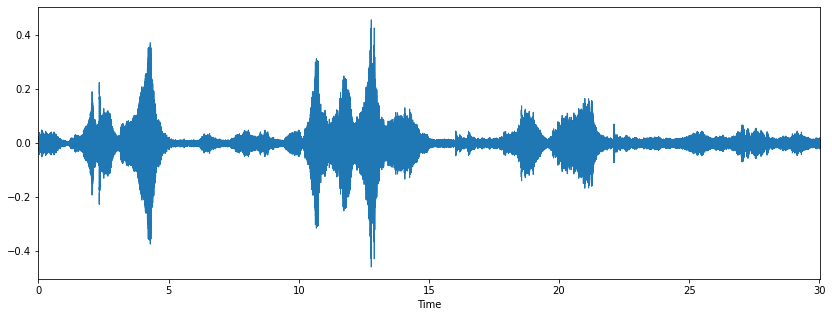

In [ ]:
fname = audio_fpath + '/classical.00041.ogg'
x, sr = librosa.load(fname, sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

#Wasveplot

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

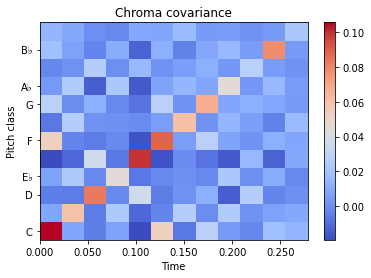

In [ ]:
# X = librosa.stft(x)
# Xdb = librosa.amplitude_to_db(abs(X))
# plt.figure(figsize=(14, 5)) #Size of the image
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
# plt.colorbar()
# plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
# plt.colorbar()
y, sr = librosa.load(fname, sr=44100)
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
ccov = np.cov(chroma)
plt, ax = plt.subplots()
img = librosa.display.specshow(ccov, y_axis='chroma', x_axis='time',
                               key='Eb:maj', ax=ax)
ax.set(title='Chroma covariance')
plt.colorbar(img, ax=ax)


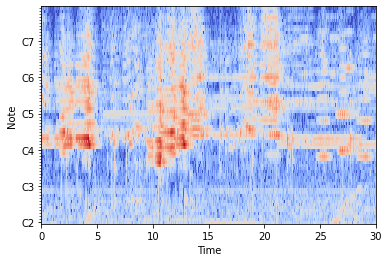

In [ ]:
x, sr = librosa.load(fname)
ipd.Audio(x, rate=sr)
fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)


logC = librosa.amplitude_to_db(np.abs(C))
#plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')



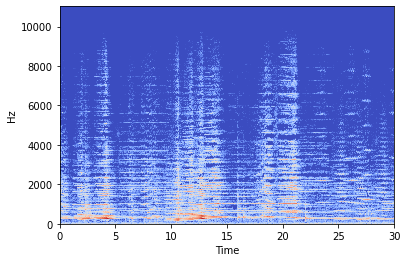

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
#plt.figure(figsize=(14, 5)) #Size of the image
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
#plt.colorbar()

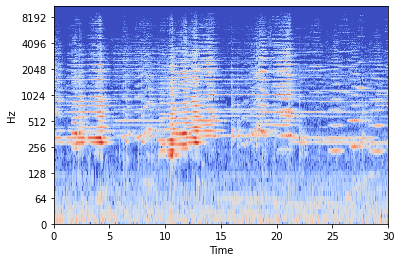

In [ ]:
#plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
#plt.colorbar()